In [1]:
import pandas as pd

In [6]:
pip install langdetect

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ------------------------------------- 981.5/981.5 kB 15.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993251 sha256=e5853501b1bb4a772dd4450798754df011d87e85ceb5b27ee64c8728f1a2e3f1
  Stored in directory: c:\users\shrey\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\c1\67\88\e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
Note: you may need to restart the kernel to 

In [4]:
#Load the master-file data
transcription_data = pd.read_excel("master-file.xlsx", usecols=["transcript"])  # Column K for participant-generated content
transcription_data.info()

full_data = pd.read_excel("master-file.xlsx")
print(full_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  1439 non-null   object
dtypes: object(1)
memory usage: 11.4+ KB
Index(['iteration_cycle', 'participant_id', 'table_id', 'room_id', 'speaker',
       'joined_at', 'start_time', 'start_timestamp', 'end_time',
       'end_timestamp', 'transcript'],
      dtype='object')


In [7]:
from langdetect import detect, DetectorFactory

# Set a seed for consistent results
DetectorFactory.seed = 0

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Apply language detection
transcription_data['language'] = transcription_data['transcript'].apply(detect_language)

# Display language counts
print(transcription_data['language'].value_counts())

language
en         902
id         103
de          72
pt          40
af          38
sw          30
it          30
fr          28
gu          21
cy          19
no          18
sq          15
so          14
zh-cn        9
tl           8
et           8
pl           8
tr           6
da           5
ur           5
es           5
ar           5
sv           5
ko           5
nl           5
sk           5
hr           4
ca           4
unknown      4
vi           3
cs           3
lt           2
hu           2
sl           2
fi           2
fa           2
ja           1
ro           1
Name: count, dtype: int64


In [8]:
# Filter the DataFrame for English transcripts
english_transcripts = transcription_data[transcription_data['language'] == 'en']

# Display information about the filtered DataFrame
english_transcripts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 1434
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  902 non-null    object
 1   language    902 non-null    object
dtypes: object(2)
memory usage: 21.1+ KB


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.75)

# Fit and transform the 'transcript' column of the DataFrame
doc_term_matrix = tfidf_vectorizer.fit_transform(transcription_data['transcript'])

# Print the shape of the document-term matrix
print(f'Rows: {doc_term_matrix.shape[0]}, Columns: {doc_term_matrix.shape[1]}')

Rows: 1439, Columns: 143


In [11]:
# Import necessary libraries
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Define the number of topics
num_topics = 5

# Initialize the LDA model
lda_topic_model = LDA(n_components=num_topics, random_state=12345)

# Assuming doc_term_matrix is your document-term matrix from TfidfVectorizer
doc_topic_matrix = lda_topic_model.fit_transform(doc_term_matrix)

# Create column names for each topic
col_names = [f'Topic {x}' for x in range(1, num_topics + 1)]

# Create a DataFrame to store the topic distribution for each document
doc_topic_df = pd.DataFrame(doc_topic_matrix, columns=col_names)

# Display the first 10 rows of the DataFrame
doc_topic_df.head(10)


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,0.550476,0.244151,0.067836,0.069032,0.068506
1,0.200000,0.200000,0.200000,0.200000,0.200000
2,0.241202,0.073720,0.073722,0.537342,0.074013
3,0.068385,0.450538,0.069226,0.067940,0.343909
4,0.100002,0.100001,0.100002,0.100002,0.599993
5,0.100004,0.100003,0.100005,0.100004,0.599984
6,0.599996,0.100001,0.100001,0.100001,0.100001
7,0.200000,0.200000,0.200000,0.200000,0.200000
8,0.100000,0.100000,0.599999,0.100000,0.100000
9,0.084015,0.084497,0.663099,0.084373,0.084016


In [12]:
num_words = 10

for topic, words in enumerate(lda_topic_model.components_):
    word_total = words.sum()
    sorted_words = words.argsort()[::-1]
    print(f'\nTopic {topic + 1:02d}')
    for i in range(num_words):
        word = tfidf_vectorizer.get_feature_names_out()[sorted_words[i]]
        word_weight = words[sorted_words[i]]  # Correct variable name
        print(f' {word} ({word_weight:.3f})')  # Use word_weight instead of word_wright



Topic 01
 right (45.712)
 don (26.747)
 oh (21.963)
 know (18.202)
 lot (16.689)
 agree (11.631)
 guess (9.786)
 ideas (7.976)
 actually (7.788)
 like (7.436)

Topic 02
 um (73.815)
 like (48.206)
 energy (31.223)
 think (27.293)
 hello (16.986)
 solar (14.270)
 feel (13.908)
 sure (13.303)
 just (13.238)
 supposed (12.407)

Topic 03
 yeah (93.870)
 mhm (48.754)
 solar (15.822)
 just (10.624)
 panels (7.785)
 sorry (7.452)
 person (5.067)
 panel (4.780)
 anybody (4.694)
 did (3.725)

Topic 04
 uh (56.216)
 know (44.218)
 people (16.603)
 hi (14.578)
 new (10.061)
 mm (8.200)
 think (7.612)
 jersey (7.503)
 thing (7.273)
 ja (7.200)

Topic 05
 ok (49.419)
 really (19.050)
 yes (18.003)
 idea (12.972)
 hear (10.856)
 mean (8.658)
 everybody (8.117)
 going (7.567)
 like (7.465)
 thought (6.316)


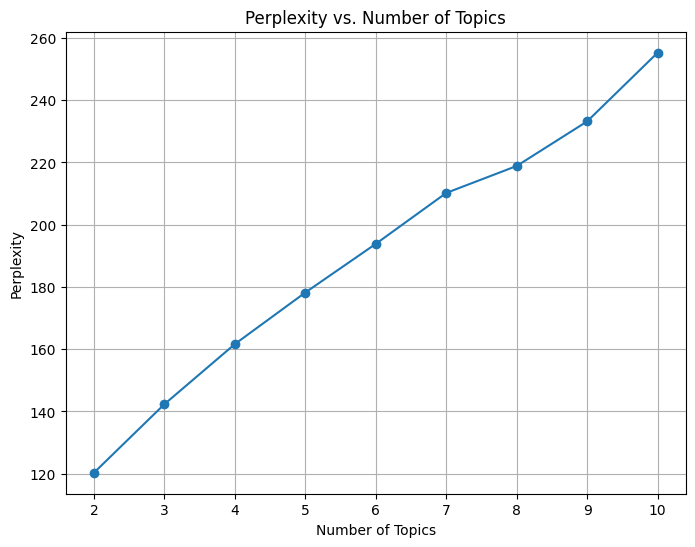

In [14]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt

perplexity = []
topic_nums = range(2, 11)

for topics in topic_nums:
    lda = LDA(n_components=topics, random_state=1234)
    lda.fit(doc_term_matrix)  # Use doc_term_matrix instead of doc_topic_matrix

    perplexity.append(lda.perplexity(doc_term_matrix))  # Calculate perplexity on the doc-term matrix

# Plotting the perplexity results
plt.figure(figsize=(8, 6))
plt.plot(topic_nums, perplexity, marker='o')
plt.title('Perplexity vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.xticks(topic_nums)
plt.grid()
plt.show()

you would look for an "elbow" point in the plot, where increasing the number of topics results in diminishing returns on the reduction of perplexity. This point can guide you in choosing an optimal number of topics for your LDA model.

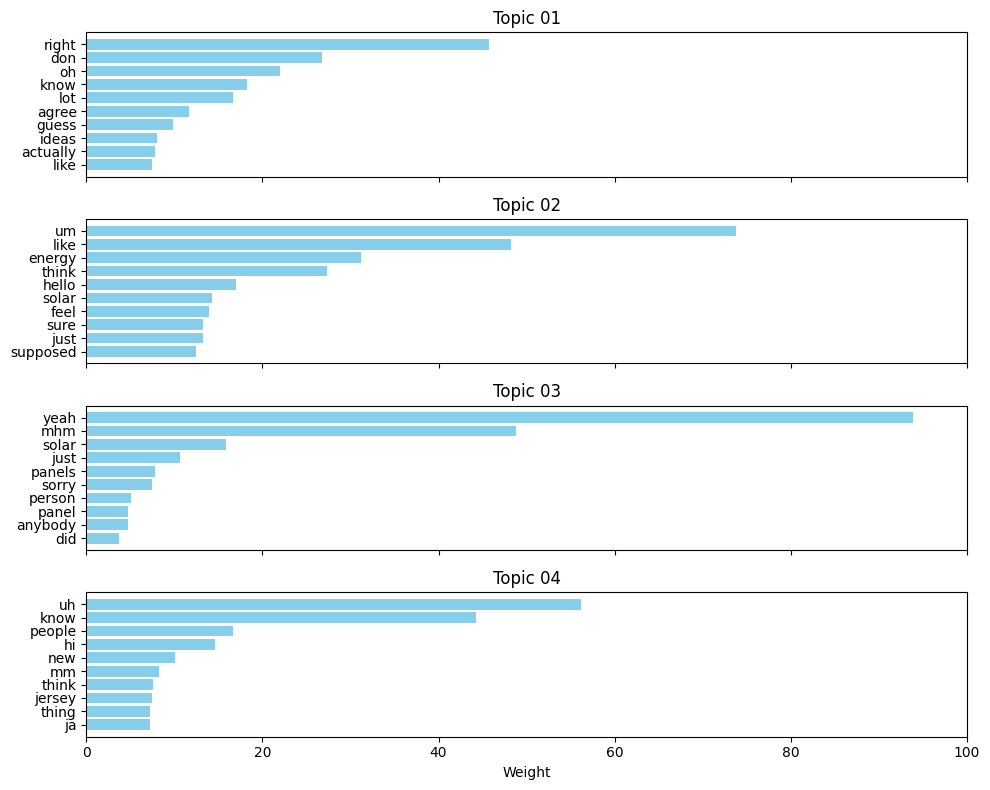

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of topics and their respective top words
num_topics = 4  # Adjust based on the actual number of topics
top_words = 10  # Number of top words to display for each topic

# Data for the top words in each topic
topics_data = {
    'Topic 01': [45.712, 26.747, 21.963, 18.202, 16.689, 11.631, 9.786, 7.976, 7.788, 7.436],
    'Topic 02': [73.815, 48.206, 31.223, 27.293, 16.986, 14.270, 13.908, 13.303, 13.238, 12.407],
    'Topic 03': [93.870, 48.754, 15.822, 10.624, 7.785, 7.452, 5.067, 4.780, 4.694, 3.725],
    'Topic 04': [56.216, 44.218, 16.603, 14.578, 10.061, 8.200, 7.612, 7.503, 7.273, 7.200]
}

# Corresponding top words for each topic
words = {
    'Topic 01': ['right', 'don', 'oh', 'know', 'lot', 'agree', 'guess', 'ideas', 'actually', 'like'],
    'Topic 02': ['um', 'like', 'energy', 'think', 'hello', 'solar', 'feel', 'sure', 'just', 'supposed'],
    'Topic 03': ['yeah', 'mhm', 'solar', 'just', 'panels', 'sorry', 'person', 'panel', 'anybody', 'did'],
    'Topic 04': ['uh', 'know', 'people', 'hi', 'new', 'mm', 'think', 'jersey', 'thing', 'ja']
}

# Plotting
fig, axs = plt.subplots(num_topics, 1, figsize=(10, 8), sharex=True)

for i, (topic, weights) in enumerate(topics_data.items()):
    axs[i].barh(words[topic], weights, color='skyblue')
    axs[i].set_title(topic)
    axs[i].invert_yaxis()  # Invert y-axis to have the highest weight at the top
    axs[i].set_xlim(0, max(max(weights) * 1.1, 100))  # Set x-axis limit

plt.xlabel('Weight')
plt.tight_layout()
plt.show()


**Topic 01:** The first topic is characterized by a conversational tone, with frequent occurrences of words such as "right," "don," and "know." This suggests a collaborative discussion environment where participants express agreement and share ideas. The high prevalence of terms like "lot" and "guess" indicates a sense of open-endedness and exploration, highlighting the participants' willingness to engage in thoughtful dialogue.

**Topic 02:** This topic centers around discussions related to energy, with prominent words including "um," "like," and "energy." The emphasis on terms such as "solar" and "think" suggests that participants are contemplating renewable energy solutions, reflecting a broader societal trend towards sustainability. The frequent use of informal speech, as seen with words like "hello" and "feel," points to a casual yet engaged atmosphere, which may facilitate open exchanges about personal experiences and opinions on energy matters.

**Topic 03:** The third topic is heavily focused on solar energy technologies, with notable terms like "yeah," "mhm," and "solar" being prevalent. This indicates that participants are likely sharing information or opinions about solar panels, showcasing an interest in renewable energy sources. The presence of conversational fillers such as "just" and "sorry" suggests an informal setting where participants feel comfortable expressing their thoughts, potentially leading to a rich exchange of knowledge regarding solar technologies.

**Topic 04:** The fourth topic features words like "uh," "know," and "people," indicating a familiar tone among speakers. The use of casual expressions such as "hi" and "new" reflects a social dynamic that promotes discussion on community-related topics. This theme may highlight the participants' shared experiences or local initiatives, suggesting that the conversations are rooted in their immediate environment and social circles